# Creating Synthetic Daataset

A synthetic dataset is a computer generated dataset. 

In [11]:
# synthetic classification dataset
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot

In [12]:
# define dataset
X, y = make_classification(n_samples = 1000, n_features = 2, n_informative = 2, n_redundant = 0,
                          n_clusters_per_class = 1, random_state = 4)

In [13]:
print(X)

[[ 1.22515974 -0.95173116]
 [ 1.01630365 -1.72517506]
 [ 0.33534004 -1.7248955 ]
 ...
 [ 1.54270795 -0.05566478]
 [ 0.81664566 -1.2509187 ]
 [ 1.13782254 -1.26151957]]


In [14]:
print(y)

[1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0
 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1
 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1
 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0
 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0
 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0
 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0
 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1
 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1
 1 0 1 1 0 1 0 1 1 1 1 0 

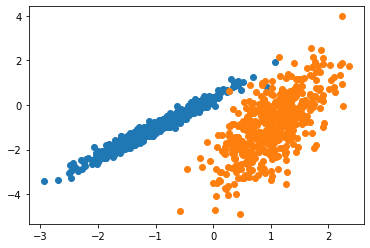

In [19]:
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = where(y == class_value)
    # create scatter of these samples
    pyplot.scatter(X[row_ix,0],X[row_ix,1])
# show the plot
pyplot.show()
    

This is a scatter plot of all the 0s and 1s with respect to their X value. 

The two groups that we can clearly see here are the groups of 0s and 1s.

# 1. Affinity Propagation Clustering Algo

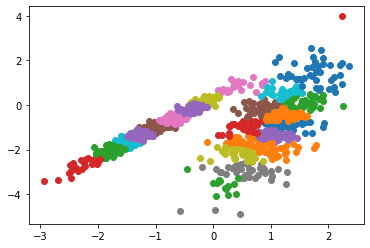

In [22]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot
#define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = AffinityPropagation(damping=0.9, random_state = 4)
#fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
    # create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

It predicted a cluster for each example in the dataset.

In this case, a good result is not achieved.

# 2. Agglomerative Clustering Algo

It is a part of Hierarchical clustering. In Hierarchical clustering we use dendogram to find the optimum number of clusters.

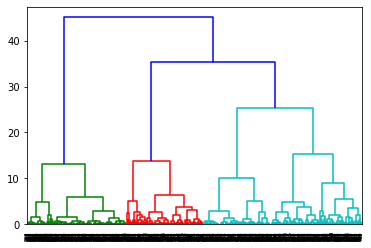

In [25]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
pyplot.show()

We have to take two clusters according to this Dendogram Graph.

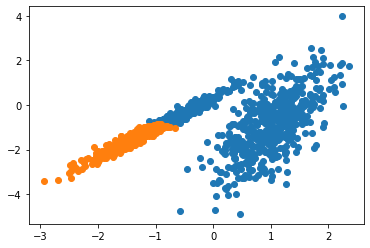

In [29]:
from sklearn.cluster import AgglomerativeClustering
# define the model
agglo_model = AgglomerativeClustering(n_clusters = 2)
# fit model and predict clusters
y_agglo = agglo_model.fit_predict(X)
# retrieve unique clusters
clusters = unique(y_agglo)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(y_agglo == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()


In this case a reasonable grouping is found.

# 3. BIRCH 

Balanced Iterative Reduncing and Clustering using Heirarchies.

Here also, dendogram will be used, to find the number of clusters needed.

This algo is really useful for large databases.

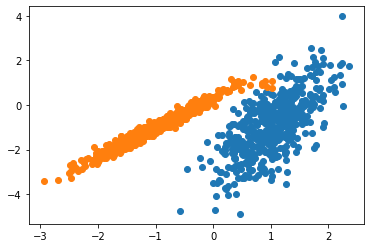

In [32]:
from sklearn.cluster import Birch
# define the model
birch_model = Birch(threshold = 0.01, n_clusters = 2)
# fit the model
birch_model.fit(X)
# assign a cluster to each example
y_birch = birch_model.predict(X)
# retrieve unique clusters
clusters = unique(y_birch)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(y_birch == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In this case an excellent grouping is found.

# 4. DBSCAN

Density-Based Spatial Clustering of Application with Noise.

This algorithm cannot analyse outliers properly.

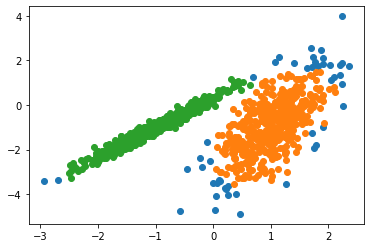

In [34]:
from sklearn.cluster import DBSCAN
# define the model
dbscan_model = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
y_dbscan = dbscan_model.fit_predict(X)
# retrieve unique clusters
clusters = unique(y_dbscan)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(y_dbscan == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

Due to presence of noise,grouping is not tuned properly.

# 5. K-Means

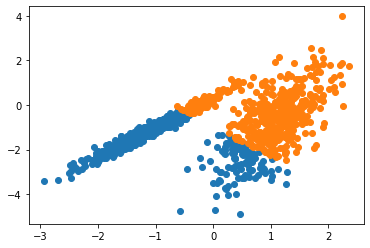

In [37]:
from sklearn.cluster import KMeans
k_model = KMeans(n_clusters=2)
# fit the model
k_model.fit(X)
# assign a cluster to each example
y_k= k_model.predict(X)
# retrieve unique clusters
clusters = unique(y_k)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(y_k == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

There is unequal variance in each dimension. This method is less suited for this dataset.

# 6. Mini-Batch K-Means


This is a modified version of K-Means which uses mini-batches of sample data instead of using the entire dataset which can make it faster for large datasets, and perhaps more robust to statistical noise.

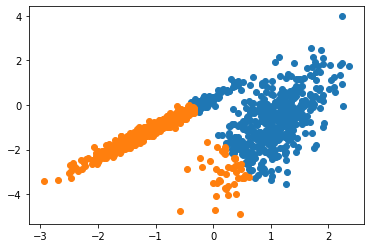

In [38]:
from sklearn.cluster import MiniBatchKMeans
# define the model
mk_model = MiniBatchKMeans(n_clusters=2)
# fit the model
mk_model.fit(X)
# assign a cluster to each example
y_mk = mk_model.predict(X)
# retrieve unique clusters
clusters = unique(y_mk)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(y_mk == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

This result is equivalent to K-Means algo.

# 7. Mean Shift

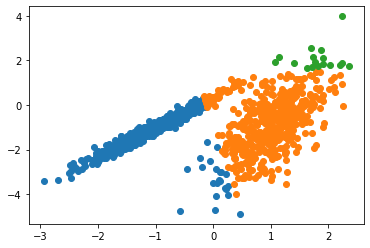

In [39]:
from sklearn.cluster import MeanShift
# define the model
ms_model = MeanShift()
# fit model and predict clusters
y_ms = ms_model.fit_predict(X)
# retrieve unique clusters
clusters = unique(y_ms)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(y_ms == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

# 8. Gaussian Mixture Model

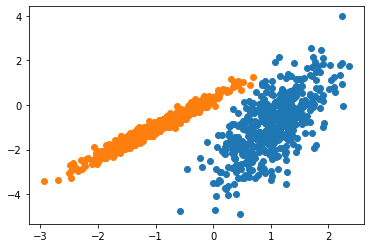

In [40]:
from sklearn.mixture import GaussianMixture
# define the model
g_model = GaussianMixture(n_components=2)
# fit the model
g_model.fit(X)
# assign a cluster to each example
y_g = g_model.predict(X)
# retrieve unique clusters
clusters = unique(y_g)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(y_g == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()